<a href="https://www.kaggle.com/code/arinjaypathak/disney-hotstar-and-movie-catalog-eda?scriptVersionId=109841422" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/disney-hotstar-tv-and-movie-catalog/hotstar.csv


In [2]:
df= pd.read_csv("/kaggle/input/disney-hotstar-tv-and-movie-catalog/hotstar.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6652 entries, 0 to 6651
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hotstar_id    6652 non-null   int64  
 1   title         6652 non-null   object 
 2   description   6652 non-null   object 
 3   genre         6652 non-null   object 
 4   year          6652 non-null   int64  
 5   age_rating    6652 non-null   object 
 6   running_time  4419 non-null   float64
 7   seasons       2233 non-null   float64
 8   episodes      2233 non-null   float64
 9   type          6652 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 519.8+ KB


In [4]:
df.head()

hotstar_id                     title  \
0  1000232077    Ram Gopal Varma ki Aag   
1  1000164652                   Niyogam   
2  1000105823  Injakkadan Mathai & Sons   
3  1000163530          Viyarppinte Vila   
4  1820041764                Ek Mulaqat   

                                         description    genre  year  \
0  Dacoit Babban Singh is on the loose in Kaligan...   Action  2007   
1  A mediator between the deity and the devotees,...    Drama  1997   
2  Injakkadan Mathai and his sons, Roy and Thanka...   Action  1993   
3  An impoverished landlord lives in past glory a...    Drama  1962   
4  Two strangers, Avi and Nikita meet at a party ...  Romance  2019   

  age_rating  running_time  seasons  episodes   type  
0    U/A 13+         152.0      NaN       NaN  movie  
1    U/A 13+         101.0      NaN       NaN  movie  
2     U/A 7+         122.0      NaN       NaN  movie  
3          U         149.0      NaN       NaN  movie  
4          U           7.0      NaN       NaN  movie

In [5]:
df.set_index("hotstar_id",inplace=True)
df.head()

title  \
hotstar_id                             
1000232077    Ram Gopal Varma ki Aag   
1000164652                   Niyogam   
1000105823  Injakkadan Mathai & Sons   
1000163530          Viyarppinte Vila   
1820041764                Ek Mulaqat   

                                                  description    genre  year  \
hotstar_id                                                                     
1000232077  Dacoit Babban Singh is on the loose in Kaligan...   Action  2007   
1000164652  A mediator between the deity and the devotees,...    Drama  1997   
1000105823  Injakkadan Mathai and his sons, Roy and Thanka...   Action  1993   
1000163530  An impoverished landlord lives in past glory a...    Drama  1962   
1820041764  Two strangers, Avi and Nikita meet at a party ...  Romance  2019   

           age_rating  running_time  seasons  episodes   type  
hotstar_id                                                     
1000232077    U/A 13+         152.0      NaN       NaN  movie  
1000164652    U/A 13+         101.0      NaN       NaN  movie  
1000105823     U/A 7+         122.0      NaN       NaN  movie  
1000163530          U         149.0      NaN       NaN  movie  
1820041764          U           7.0      NaN       NaN  movie

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

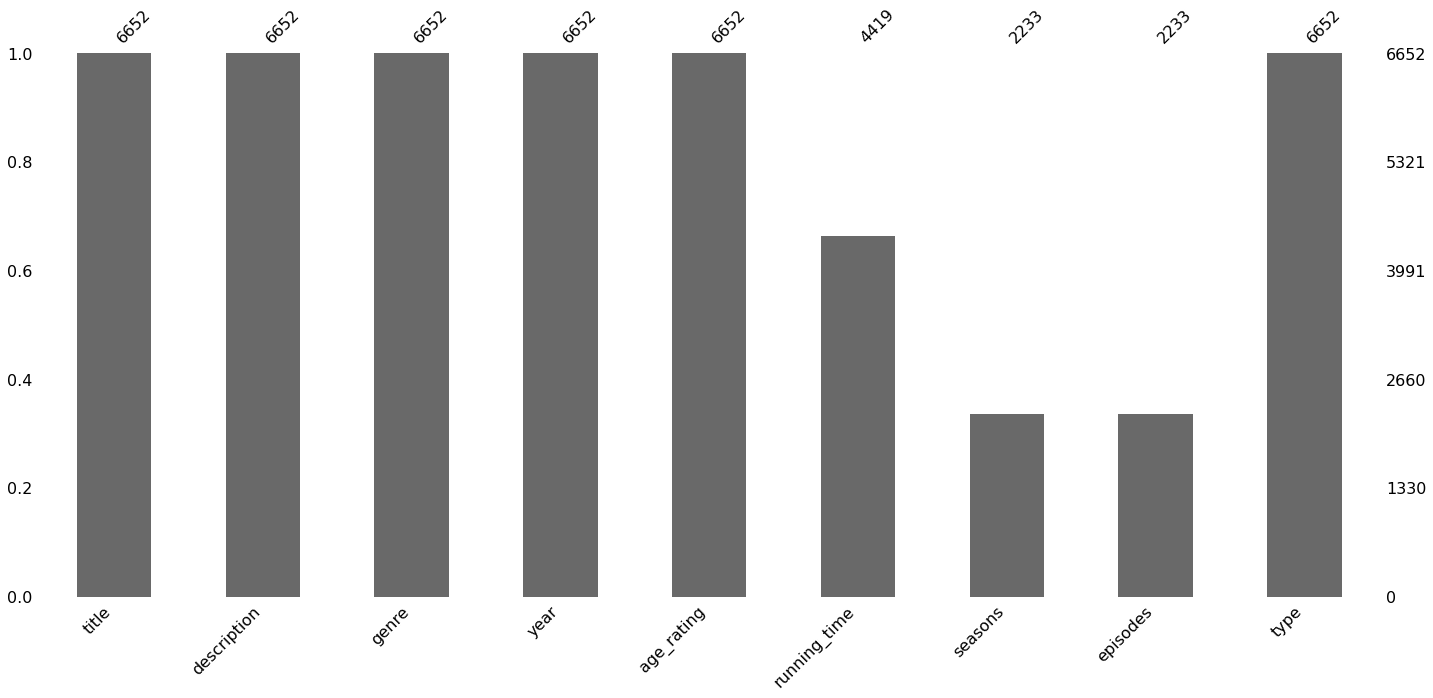

In [7]:
import missingno as msn
msn.bar(df)

In [8]:
df["seasons"].unique()

array([nan,  1., 15.,  2., 27.,  8., 23.,  6.,  9.,  3.,  4., 12.,  5.,
        7., 31., 10., 11., 21., 34., 13., 18., 28., 16., 14., 35., 73.,
       45., 53., 67., 33., 22., 43., 17., 19., 36., 29., 30., 26., 24.,
       25., 38.])

In [9]:
df["type"].unique()

array(['movie', 'tv'], dtype=object)

In [10]:
df["genre"].unique()

array(['Action', 'Drama', 'Romance', 'Historical', 'Comedy', 'Teen',
       'Adventure', 'Mythology', 'Animation', 'Thriller', 'Horror',
       'Superhero', 'Crime', 'Family', 'Mystery', 'Science',
       'Animals & Nature', 'Documentary', 'Standup Comedy', 'Musical',
       'Kids', 'Science Fiction', 'Biopic', 'Concert Film', 'Food',
       'Sport', 'Fantasy', 'Shorts', 'Reality', 'Docudrama', 'Travel',
       'Talk Show', 'Awards', 'Lifestyle', 'Kabaddi', 'Football'],
      dtype=object)

In [11]:
df["age_rating"].unique()

array(['U/A 13+', 'U/A 7+', 'U', 'A', 'U/A 16+', 'G'], dtype=object)

Dropping rows which are containing language in age_rating

In [12]:
df.shape

(6652, 9)

In [13]:
df.drop(df.index[df['age_rating'] == 'English'], inplace=True)
df.drop(df.index[df['age_rating'] == 'Kannada'], inplace=True)
df.drop(df.index[df['age_rating'] == 'Tamil'], inplace=True)
df.drop(df.index[df['age_rating'] == 'Telugu'], inplace=True)
df.drop(df.index[df['age_rating'] == 'Hindi'], inplace=True)
df.drop(df.index[df['age_rating'] == 'Marathi'], inplace=True)
df.shape

(6652, 9)

In [14]:
df.head()

title  \
hotstar_id                             
1000232077    Ram Gopal Varma ki Aag   
1000164652                   Niyogam   
1000105823  Injakkadan Mathai & Sons   
1000163530          Viyarppinte Vila   
1820041764                Ek Mulaqat   

                                                  description    genre  year  \
hotstar_id                                                                     
1000232077  Dacoit Babban Singh is on the loose in Kaligan...   Action  2007   
1000164652  A mediator between the deity and the devotees,...    Drama  1997   
1000105823  Injakkadan Mathai and his sons, Roy and Thanka...   Action  1993   
1000163530  An impoverished landlord lives in past glory a...    Drama  1962   
1820041764  Two strangers, Avi and Nikita meet at a party ...  Romance  2019   

           age_rating  running_time  seasons  episodes   type  
hotstar_id                                                     
1000232077    U/A 13+         152.0      NaN       NaN  movie  
1000164652    U/A 13+         101.0      NaN       NaN  movie  
1000105823     U/A 7+         122.0      NaN       NaN  movie  
1000163530          U         149.0      NaN       NaN  movie  
1820041764          U           7.0      NaN       NaN  movie

Since seasons, running time and episodes are exact data and cannot/should not be estimated, there is no other choice but to drop these

In [15]:
df.dropna(axis=1,inplace=True)
df.head()

title  \
hotstar_id                             
1000232077    Ram Gopal Varma ki Aag   
1000164652                   Niyogam   
1000105823  Injakkadan Mathai & Sons   
1000163530          Viyarppinte Vila   
1820041764                Ek Mulaqat   

                                                  description    genre  year  \
hotstar_id                                                                     
1000232077  Dacoit Babban Singh is on the loose in Kaligan...   Action  2007   
1000164652  A mediator between the deity and the devotees,...    Drama  1997   
1000105823  Injakkadan Mathai and his sons, Roy and Thanka...   Action  1993   
1000163530  An impoverished landlord lives in past glory a...    Drama  1962   
1820041764  Two strangers, Avi and Nikita meet at a party ...  Romance  2019   

           age_rating   type  
hotstar_id                    
1000232077    U/A 13+  movie  
1000164652    U/A 13+  movie  
1000105823     U/A 7+  movie  
1000163530          U  movie  
1820041764          U  movie

In [16]:
df.shape

(6652, 6)

Now onto analysis-
First let us see the time frame of the data

In [17]:
print(min(df["year"]))
print(max(df["year"]))

1928
2022


In [18]:
pd.set_option("display.max_rows",5000)

In [19]:
df["year"].value_counts()

2021    553
2017    515
2019    500
2022    498
2018    449
2020    434
2016    420
2015    362
2014    238
2013    215
2010    204
2011    194
2009    178
2012    176
2008    155
2007    137
2005    126
2006    107
2004     65
2003     60
1997     59
2002     56
1999     54
1998     54
2001     53
1992     53
1990     46
1996     44
1991     43
2000     41
1995     38
1994     37
1993     36
1988     34
1985     34
1986     32
1987     27
1989     27
1982     23
1981     21
1983     19
1977     18
1984     17
1980     15
1973     15
1978     15
1979     14
1972     13
1974     12
1971     11
1965     10
1969      9
1970      7
1967      7
1964      7
1976      7
1959      6
1975      6
1968      6
1941      5
1966      5
1963      3
1961      3
1957      3
1962      3
1953      3
1947      2
1955      2
1940      2
1956      2
1950      1
1928      1
1937      1
1942      1
1951      1
1960      1
1958      1
Name: year, dtype: int64

In [20]:
sum(df[df["year"]<=2015].value_counts())

3283

In [21]:
sum(df[df["year"]>2015].value_counts())

3369

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='year', ylabel='count'>

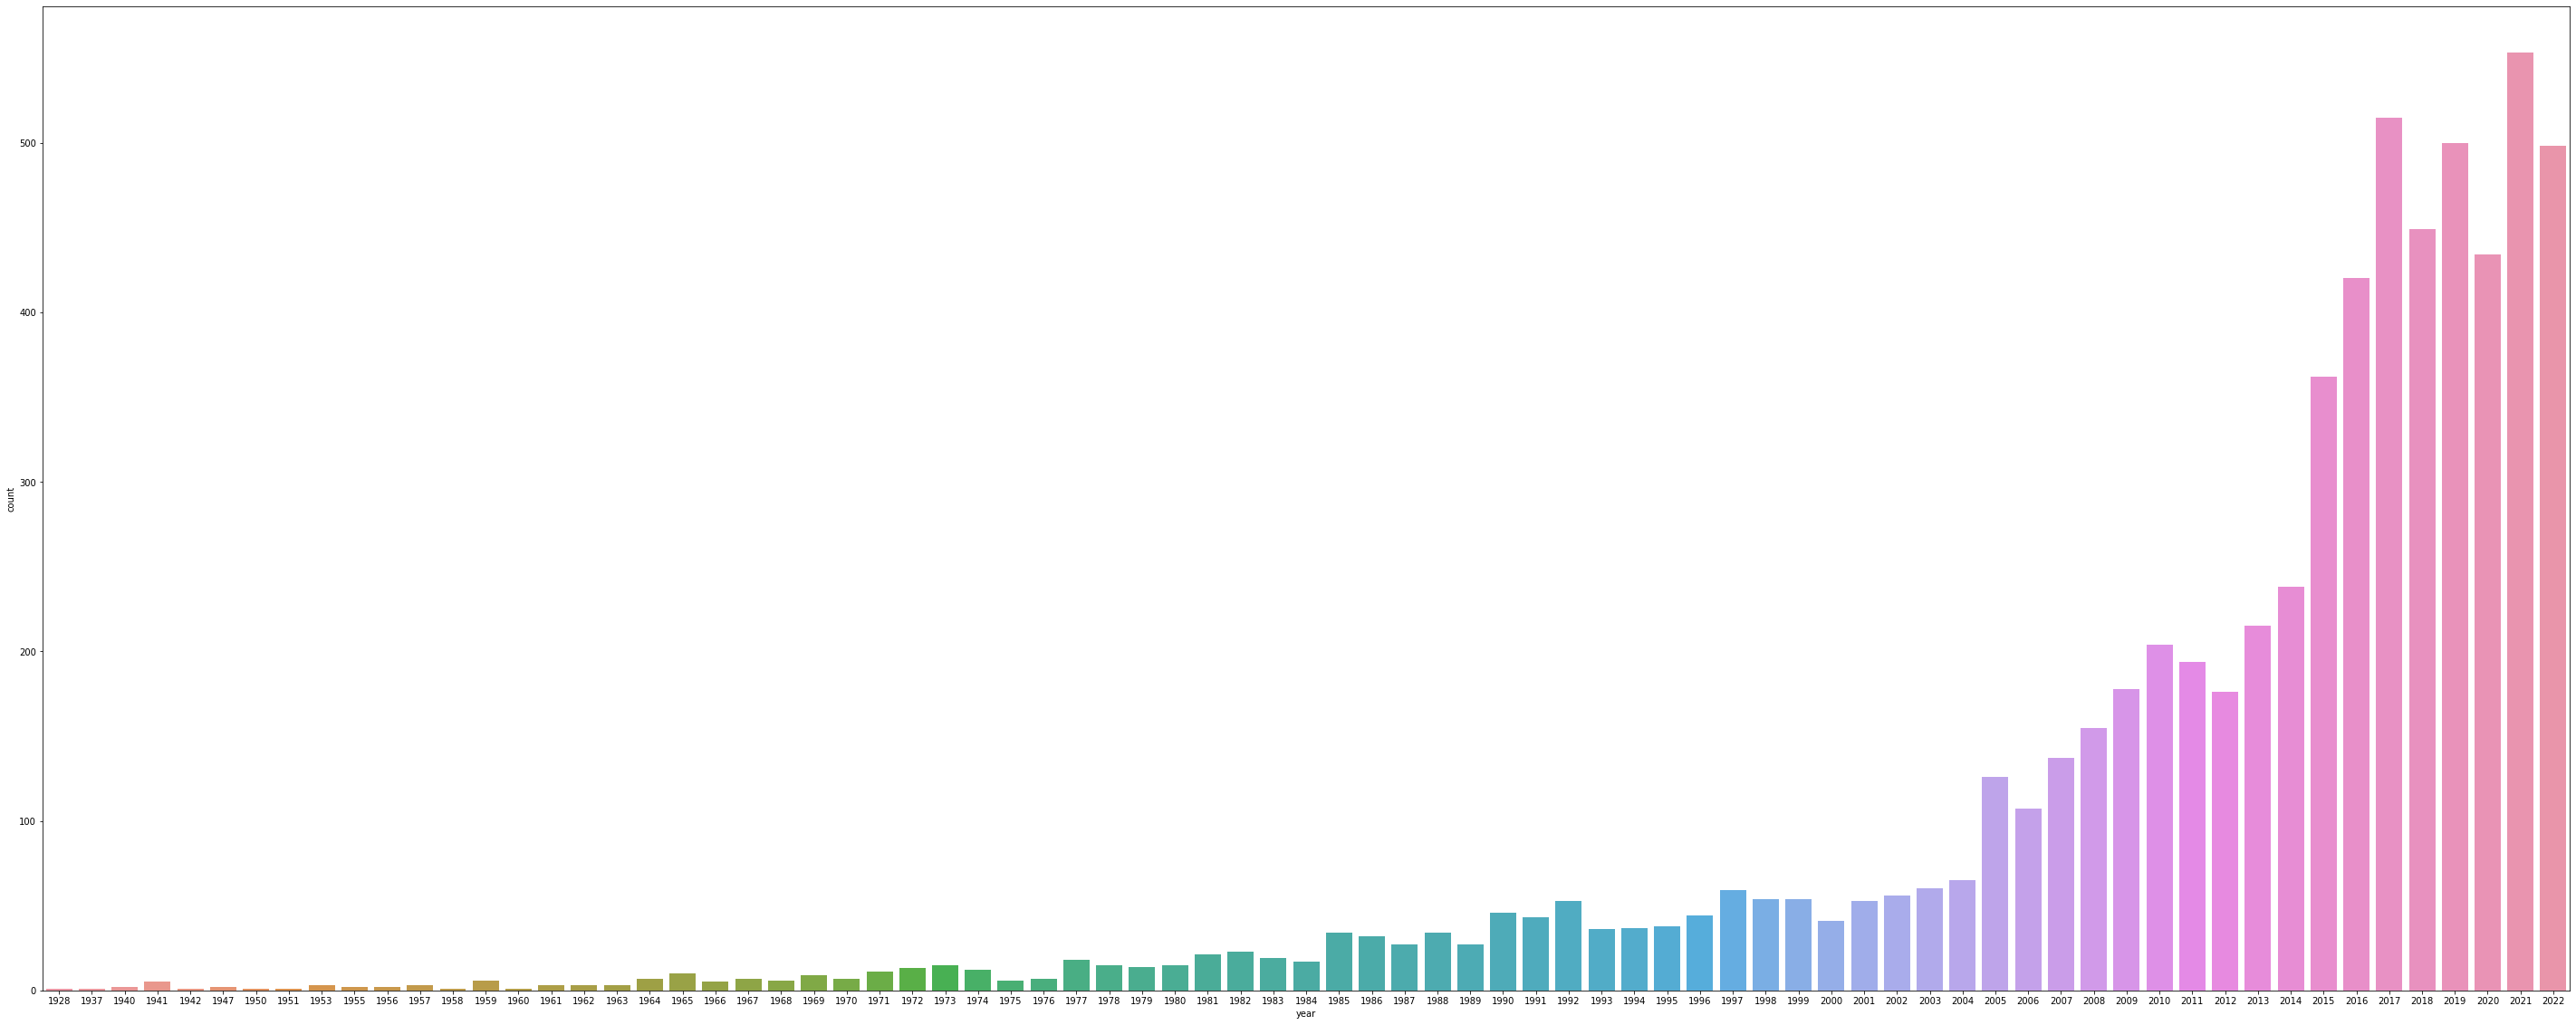

In [22]:
plt.figure(figsize=(50,20))
sns.countplot(df["year"])

This shows that all movies and series data availabe till 2015 is almost equal to all the data available after year 2015. This remarks the growth of production of movies and series from the year 2015
So, we are gonna divide the dataset in 2 eras 

In [23]:
def era(num):
    if num<=2015:
        return 1
    else:
        return 2
df["era"]=df["year"].apply(era)
df.head()

title  \
hotstar_id                             
1000232077    Ram Gopal Varma ki Aag   
1000164652                   Niyogam   
1000105823  Injakkadan Mathai & Sons   
1000163530          Viyarppinte Vila   
1820041764                Ek Mulaqat   

                                                  description    genre  year  \
hotstar_id                                                                     
1000232077  Dacoit Babban Singh is on the loose in Kaligan...   Action  2007   
1000164652  A mediator between the deity and the devotees,...    Drama  1997   
1000105823  Injakkadan Mathai and his sons, Roy and Thanka...   Action  1993   
1000163530  An impoverished landlord lives in past glory a...    Drama  1962   
1820041764  Two strangers, Avi and Nikita meet at a party ...  Romance  2019   

           age_rating   type  era  
hotstar_id                         
1000232077    U/A 13+  movie    1  
1000164652    U/A 13+  movie    1  
1000105823     U/A 7+  movie    1  
1000163530          U  movie    1  
1820041764          U  movie    2

Now, we are gonna pick up a feature one by one and do its analysis. I aim to keep analysis in 3 parts, overall, era 1(before 2016) and era 2(2016 onwards). For ease, lets divide the dataset beforehand to avoid writing long and conditional commands in future

In [24]:
df1=df[df["year"]<=2015]
print(df1.shape)
df1.head()

(3283, 7)


title  \
hotstar_id                             
1000232077    Ram Gopal Varma ki Aag   
1000164652                   Niyogam   
1000105823  Injakkadan Mathai & Sons   
1000163530          Viyarppinte Vila   
1000210911                  Rajdanda   

                                                  description   genre  year  \
hotstar_id                                                                    
1000232077  Dacoit Babban Singh is on the loose in Kaligan...  Action  2007   
1000164652  A mediator between the deity and the devotees,...   Drama  1997   
1000105823  Injakkadan Mathai and his sons, Roy and Thanka...  Action  1993   
1000163530  An impoverished landlord lives in past glory a...   Drama  1962   
1000210911  Kripa Sindhu and Sita undergo torture at the h...   Drama  1999   

           age_rating   type  era  
hotstar_id                         
1000232077    U/A 13+  movie    1  
1000164652    U/A 13+  movie    1  
1000105823     U/A 7+  movie    1  
1000163530          U  movie    1  
1000210911          U  movie    1

In [25]:
df2=df[df["year"]>2015]
print(df2.shape)
df2.head()

(3369, 7)


title  \
hotstar_id                        
1820041764           Ek Mulaqat   
1260014304        The Favourite   
1260106199  Aau Gote Love Story   
1260023080        Descendants 3   
1836049787                Piddi   

                                                  description       genre  \
hotstar_id                                                                  
1820041764  Two strangers, Avi and Nikita meet at a party ...     Romance   
1260014304  An acerbic tale of royal intrigue, passion, en...  Historical   
1260106199  Shreya and Omm fall head over heels in love wi...       Drama   
1260023080  In this highly anticipated trequel, The VKs re...        Teen   
1836049787  Sunny is about to propose to Aditi and make th...      Comedy   

            year age_rating   type  era  
hotstar_id                               
1820041764  2019          U  movie    2  
1260014304  2018          A  movie    2  
1260106199  2021    U/A 13+  movie    2  
1260023080  2019          U  movie    2  
1836049787  2021    U/A 16+  movie    2

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='genre', ylabel='count'>

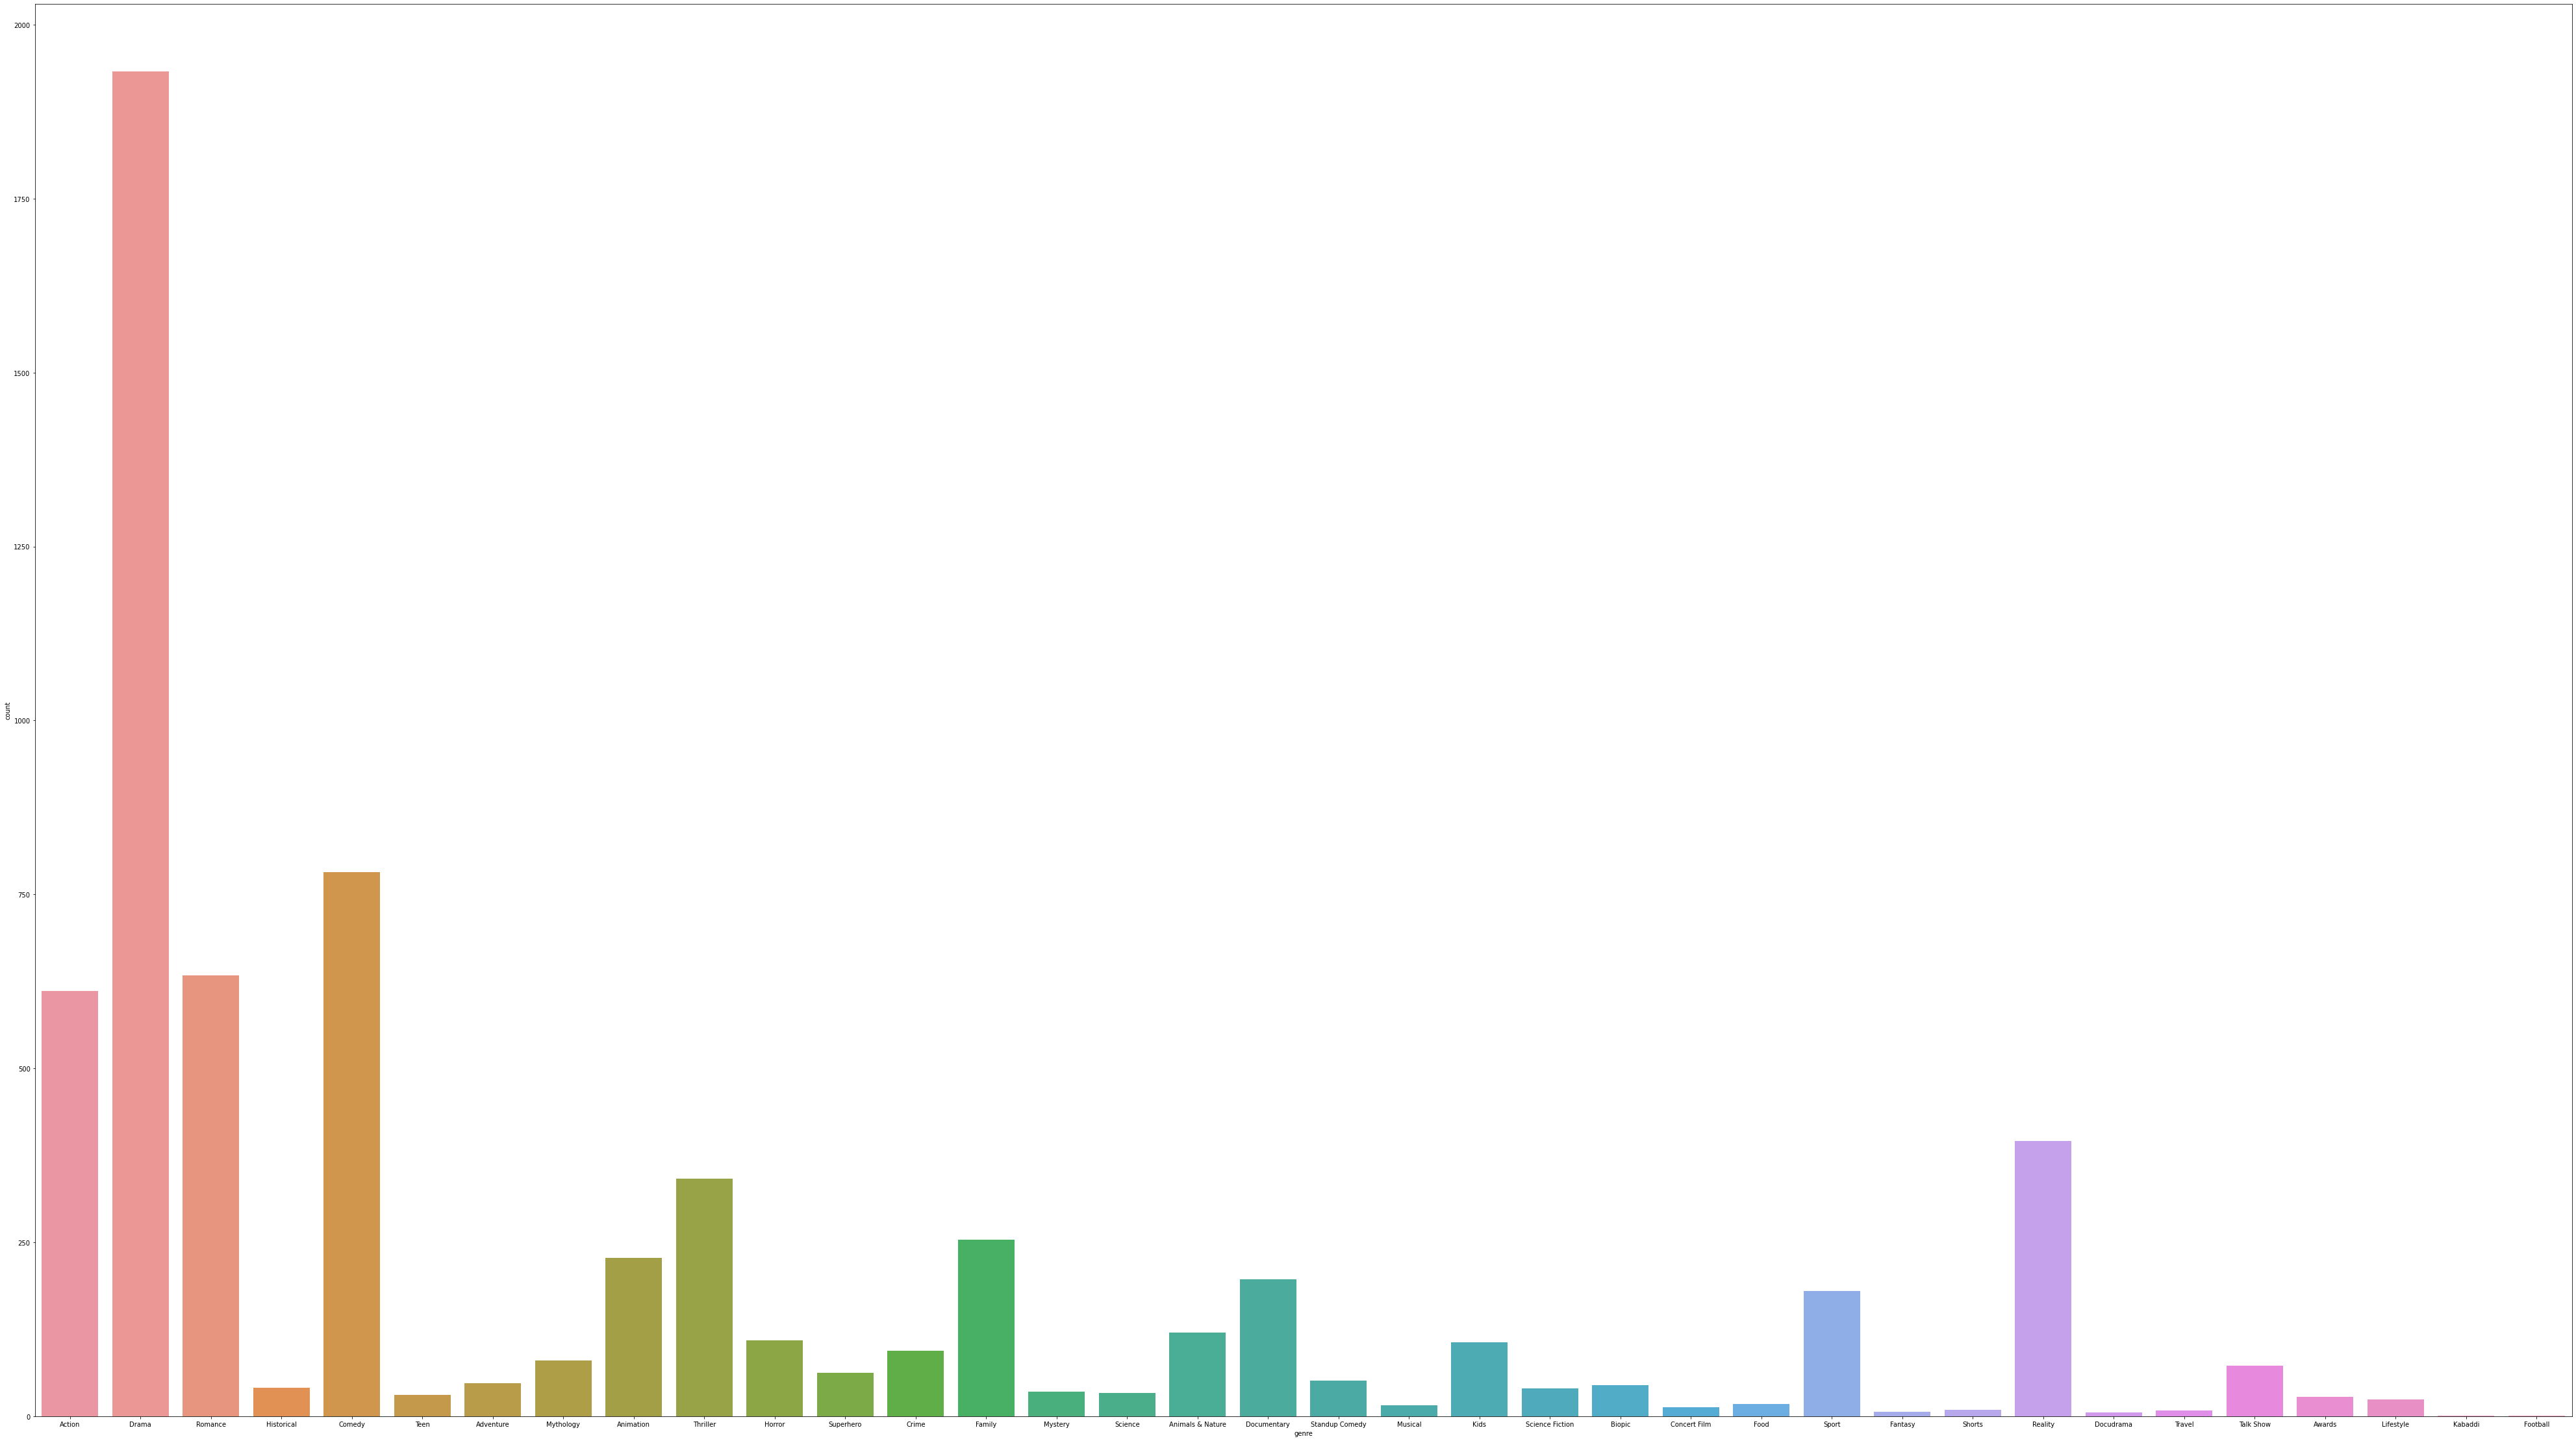

In [26]:
plt.figure(figsize=(70,40))
sns.countplot(df["genre"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='genre', ylabel='count'>

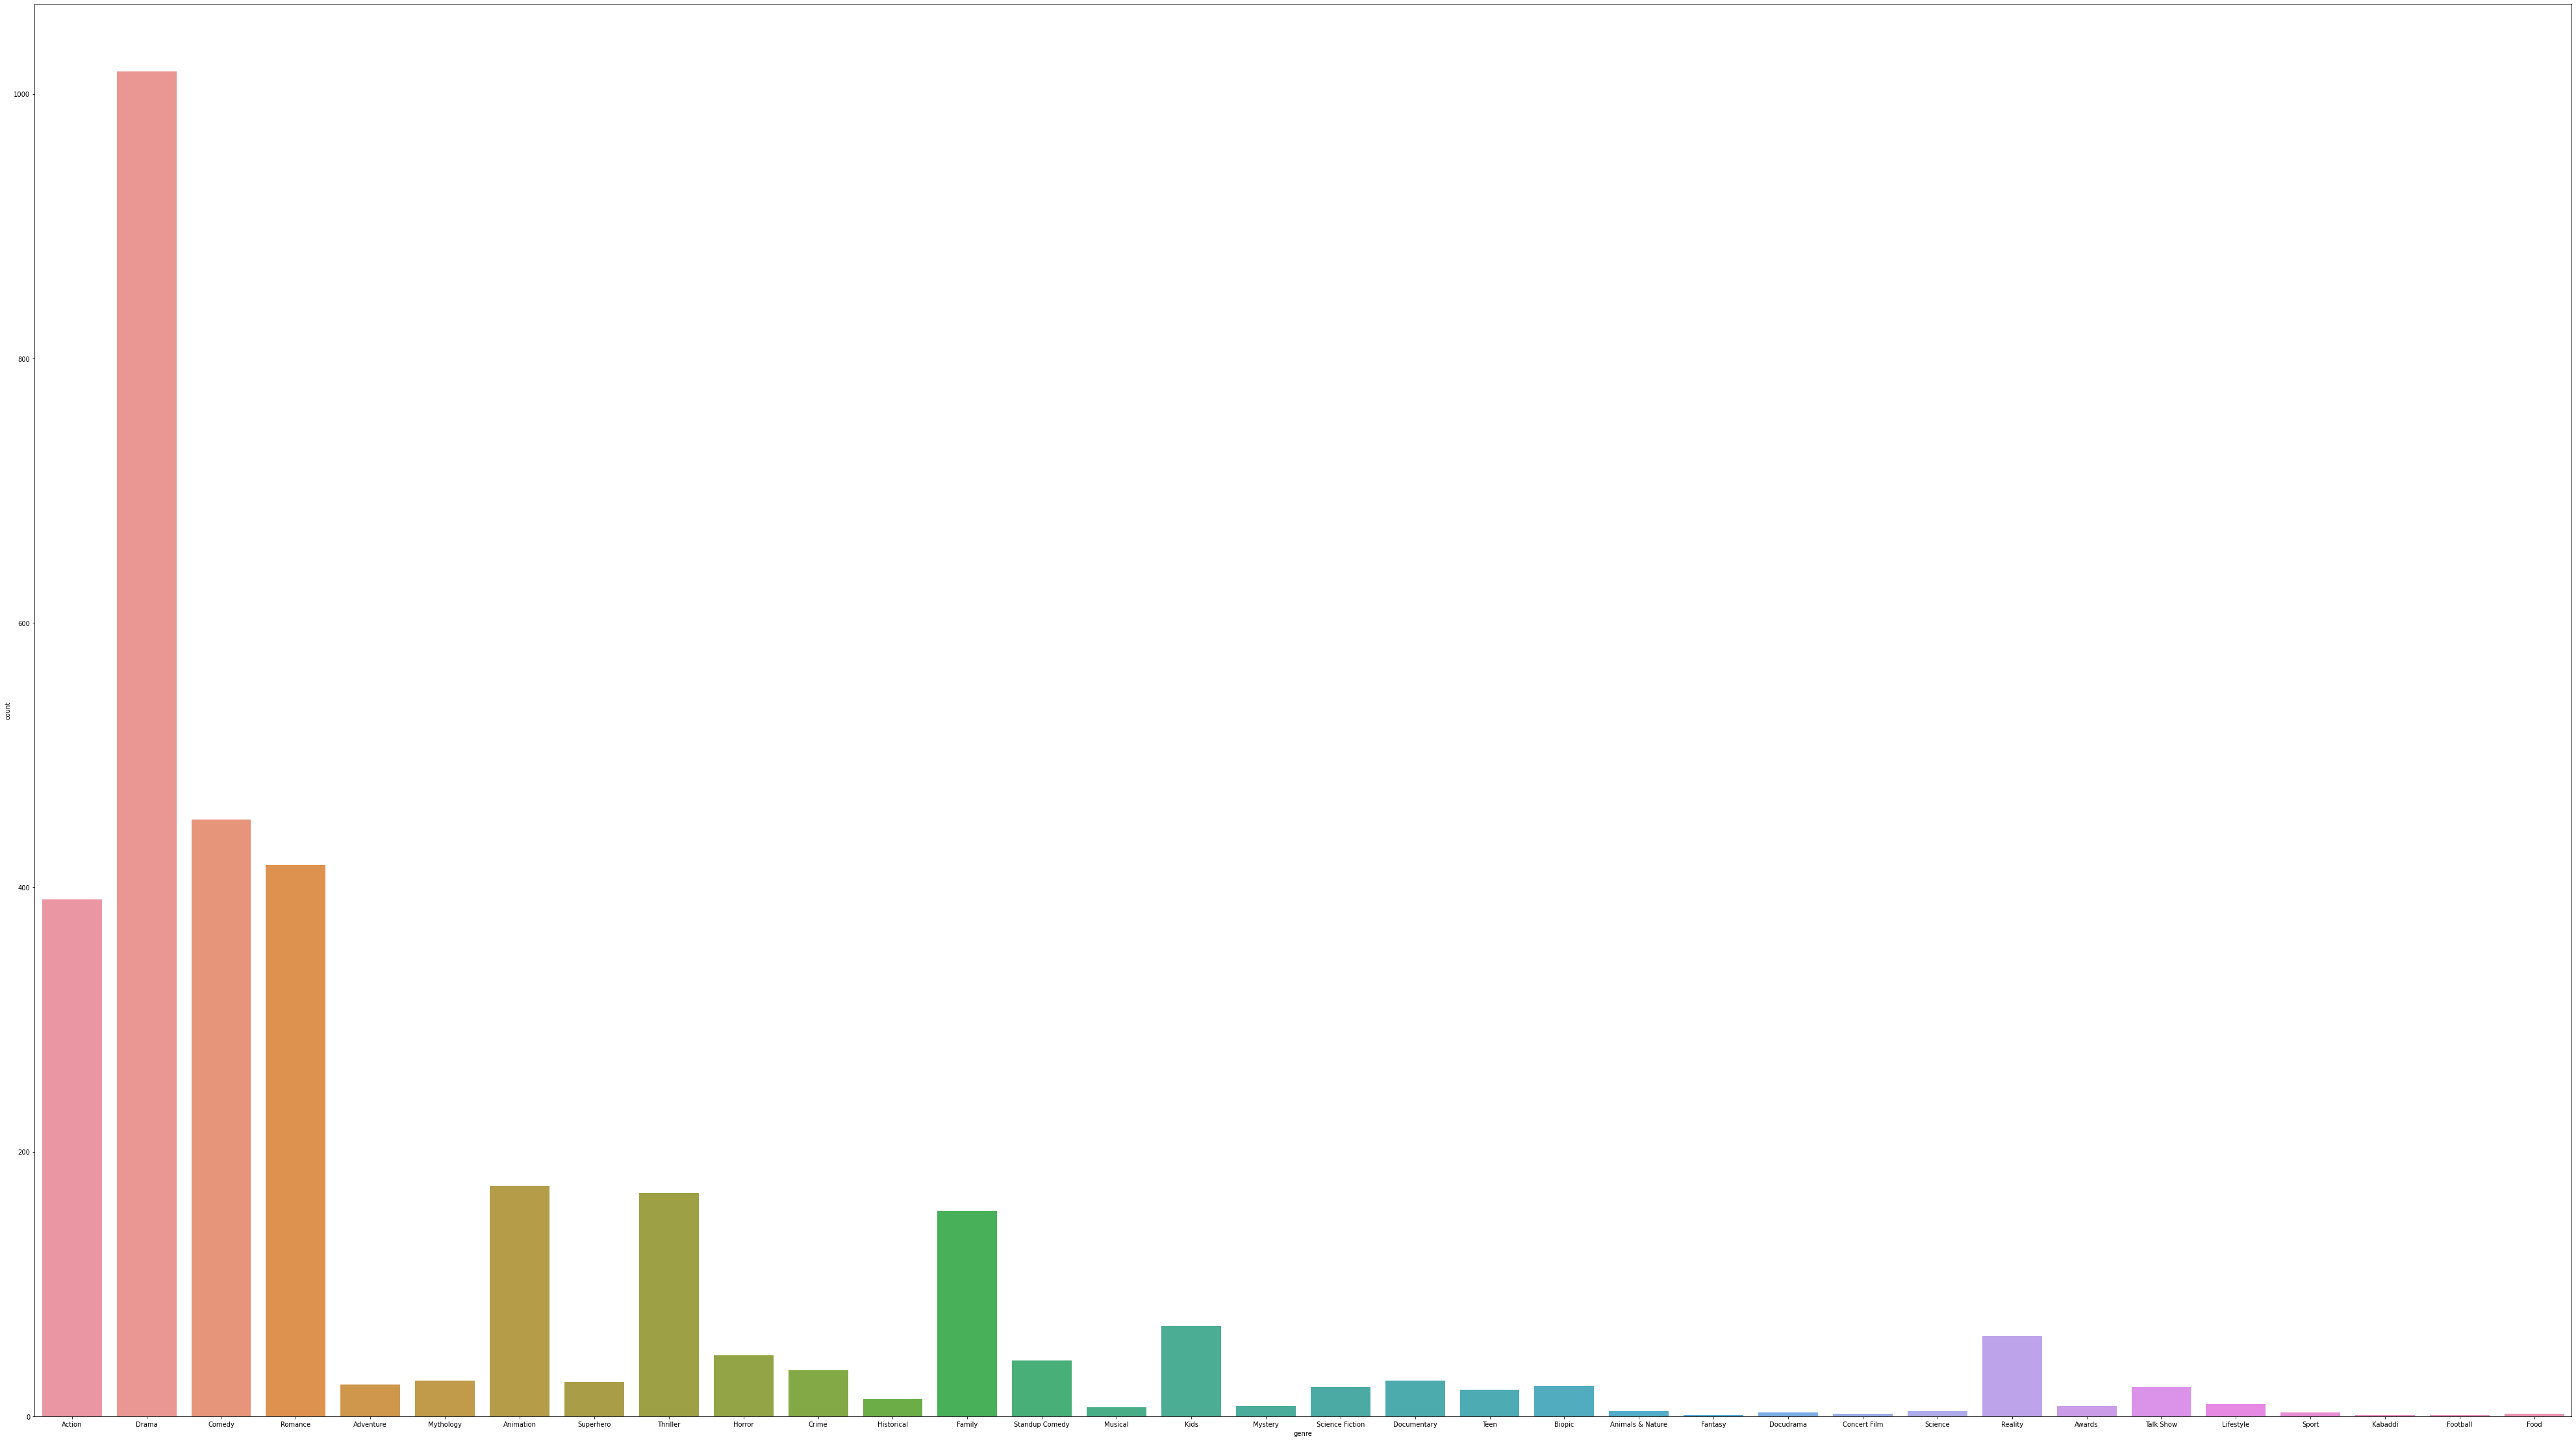

In [27]:
plt.figure(figsize=(70,40))
sns.countplot(df1["genre"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='genre', ylabel='count'>

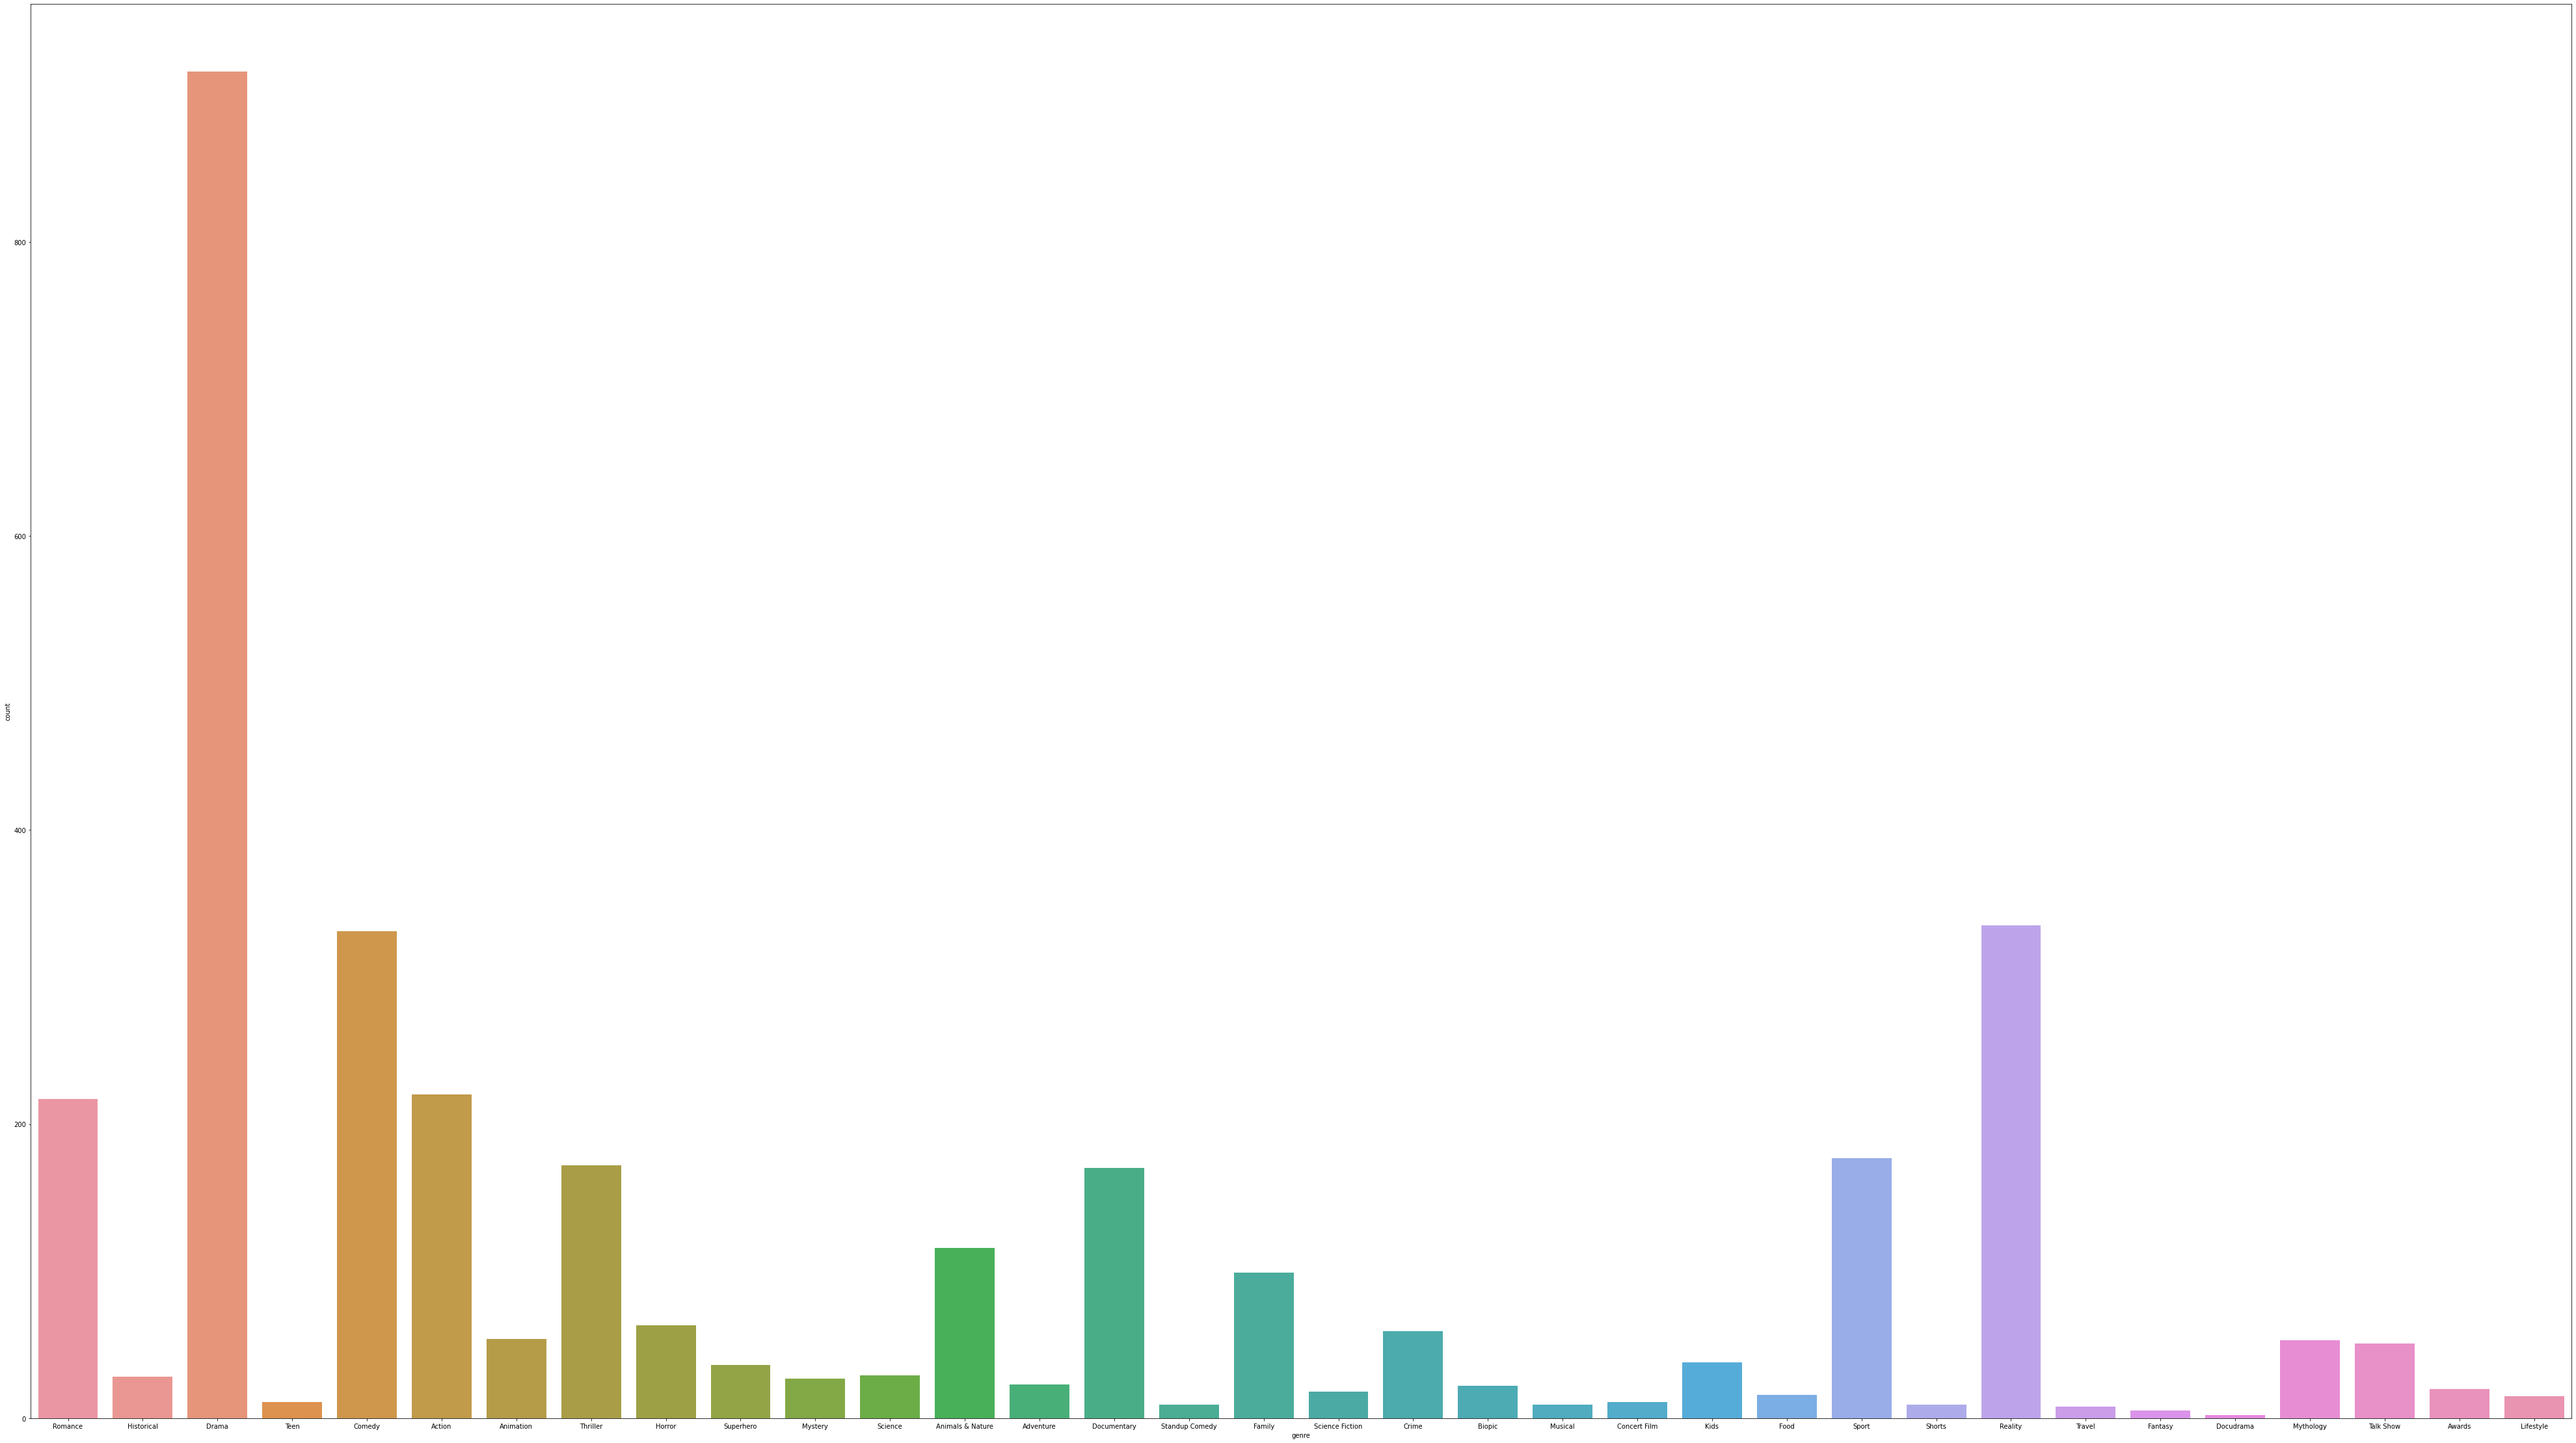

In [28]:
plt.figure(figsize=(70,40))
sns.countplot(df2["genre"])

While "drama" remained the biggest genre throughout time, "reality" saw a sharp rise in era 2 

In [29]:
d={}
for x in df["genre"].unique():
    d[x]=sum(df1[df1["genre"]==x].value_counts())-sum(df2[df2["genre"]==x].value_counts())
for c in d.keys():
    print(c,":",d[c])

Action : 171
Drama : 101
Romance : 200
Historical : -15
Comedy : 120
Teen : 9
Adventure : 1
Mythology : -26
Animation : 120
Thriller : -3
Horror : -17
Superhero : -10
Crime : -24
Family : 56
Mystery : -19
Science : -25
Animals & Nature : -112
Documentary : -143
Standup Comedy : 33
Musical : -2
Kids : 30
Science Fiction : 4
Biopic : 1
Concert Film : -9
Food : -14
Sport : -174
Fantasy : -4
Shorts : -9
Reality : -274
Docudrama : 1
Travel : -8
Talk Show : -29
Awards : -12
Lifestyle : -6
Kabaddi : 1
Football : 1


In [30]:
max(d.values())

200

In [31]:
min(d.values())

-274

The above result, if positive, shows decrease in trend of a particular genre while a negative result shows increase in a trend over time."Drama", though still in relevant size has fallen the most as a genre since 2016 while "reality" has risen up the most.

<AxesSubplot:ylabel='type'>

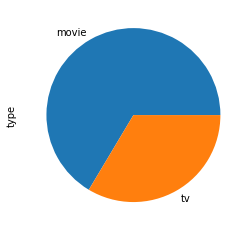

In [32]:
df["type"].value_counts().plot(kind="pie")

<AxesSubplot:ylabel='type'>

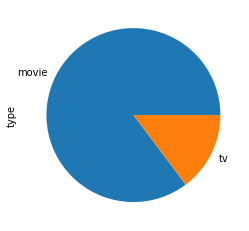

In [33]:
df1["type"].value_counts().plot(kind="pie")

<AxesSubplot:ylabel='type'>

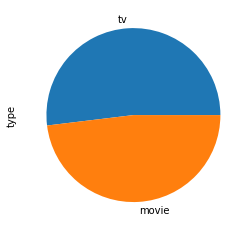

In [34]:
df2["type"].value_counts().plot(kind="pie")

This simply shows the drastic rise of tv series content over movies since 2016.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age_rating', ylabel='count'>

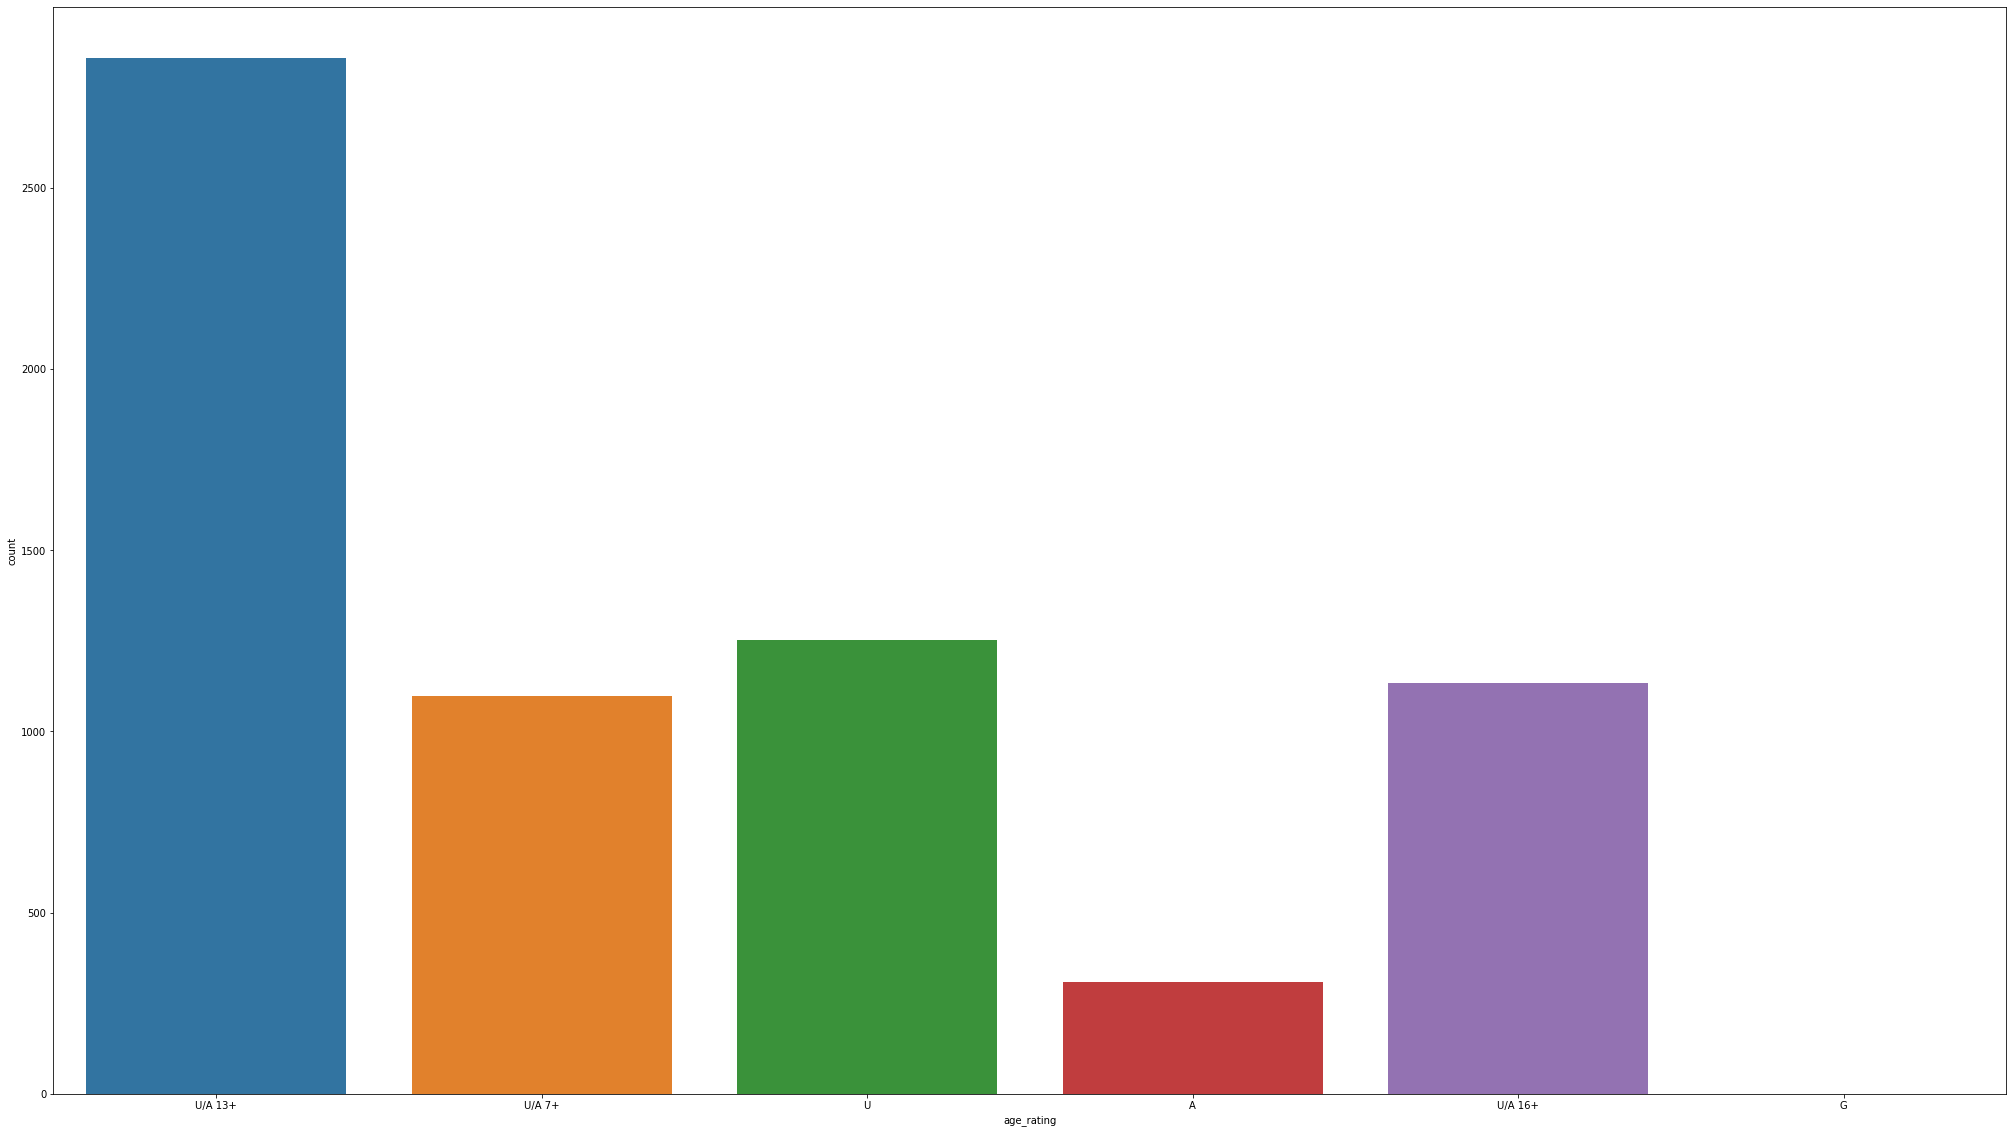

In [35]:
plt.figure(figsize=(35,20))
sns.countplot(df["age_rating"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age_rating', ylabel='count'>

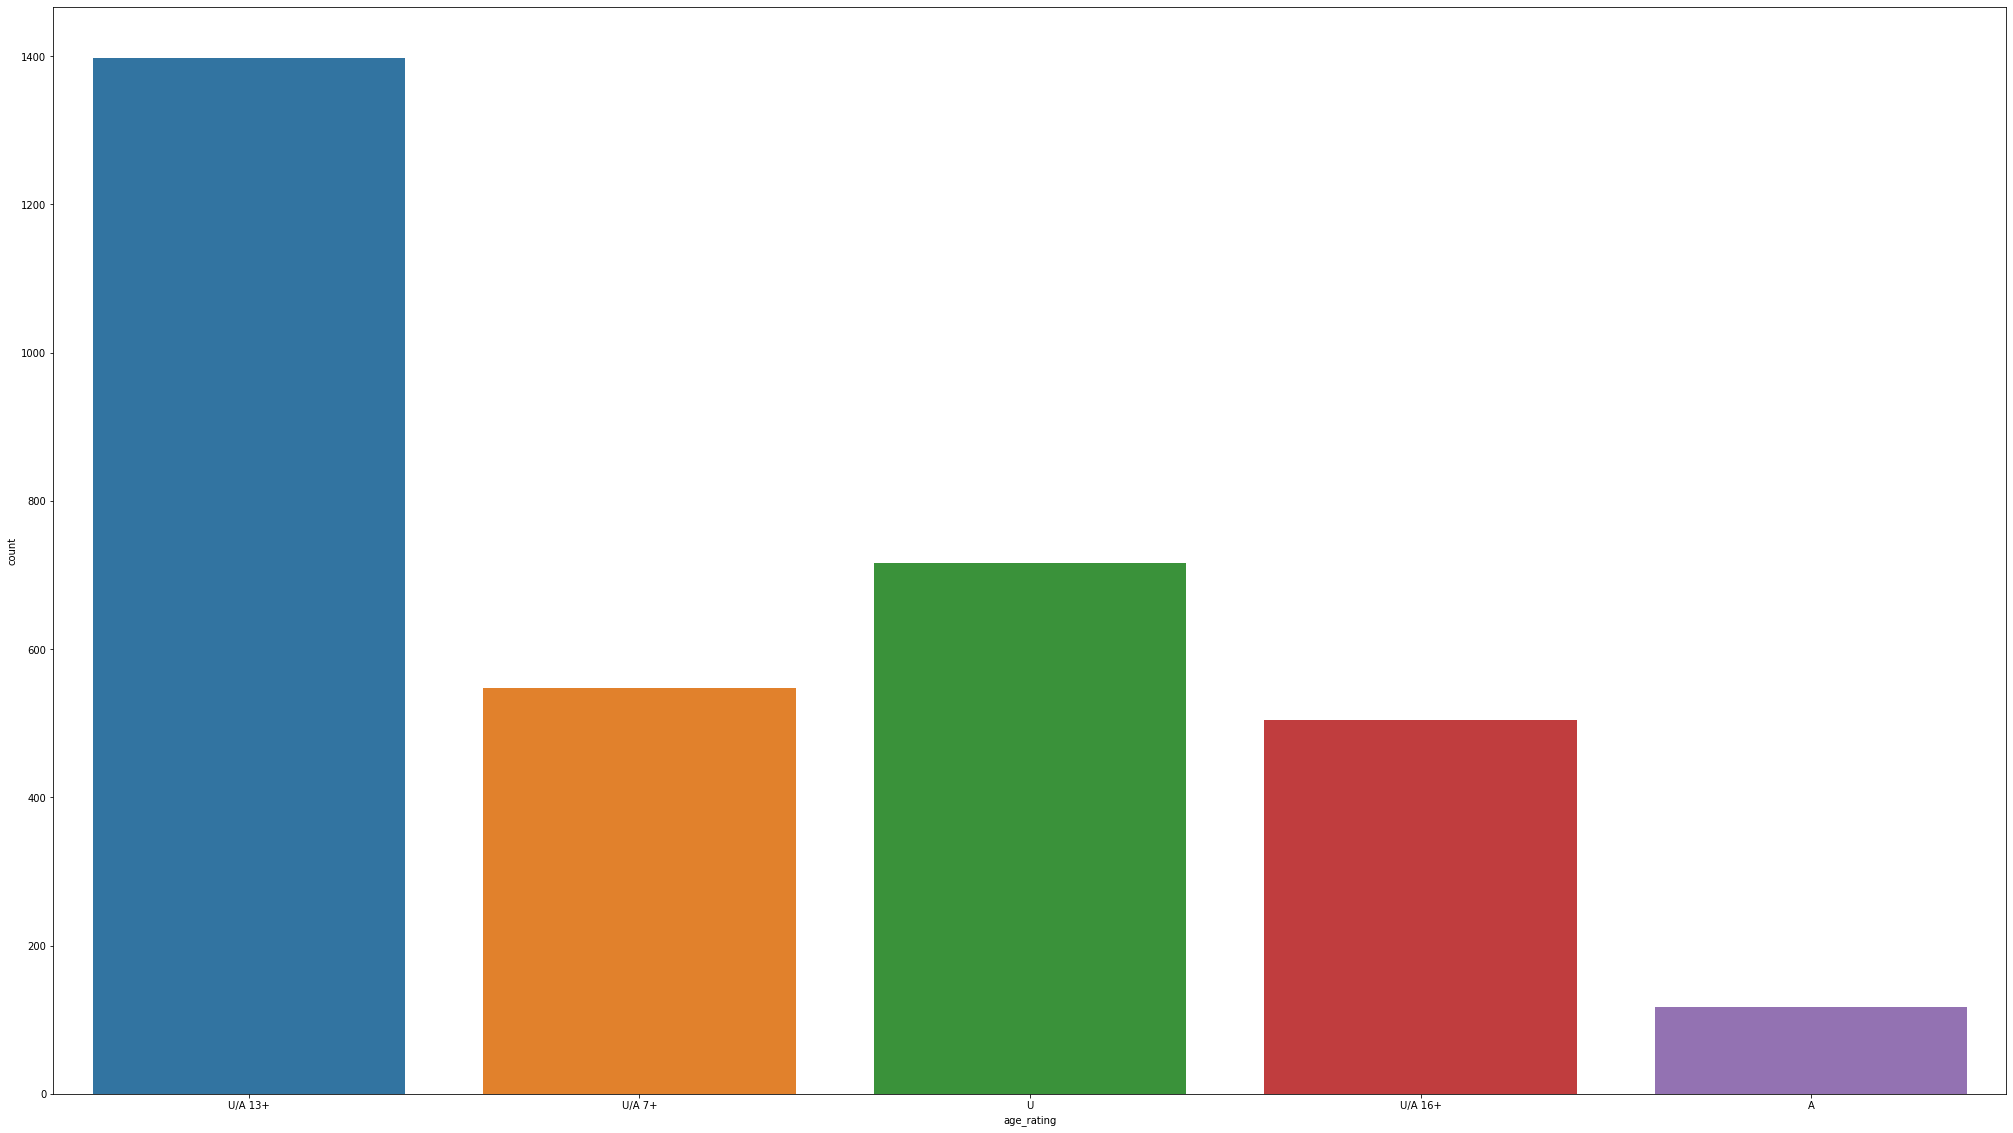

In [36]:
plt.figure(figsize=(35,20))
sns.countplot(df1["age_rating"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age_rating', ylabel='count'>

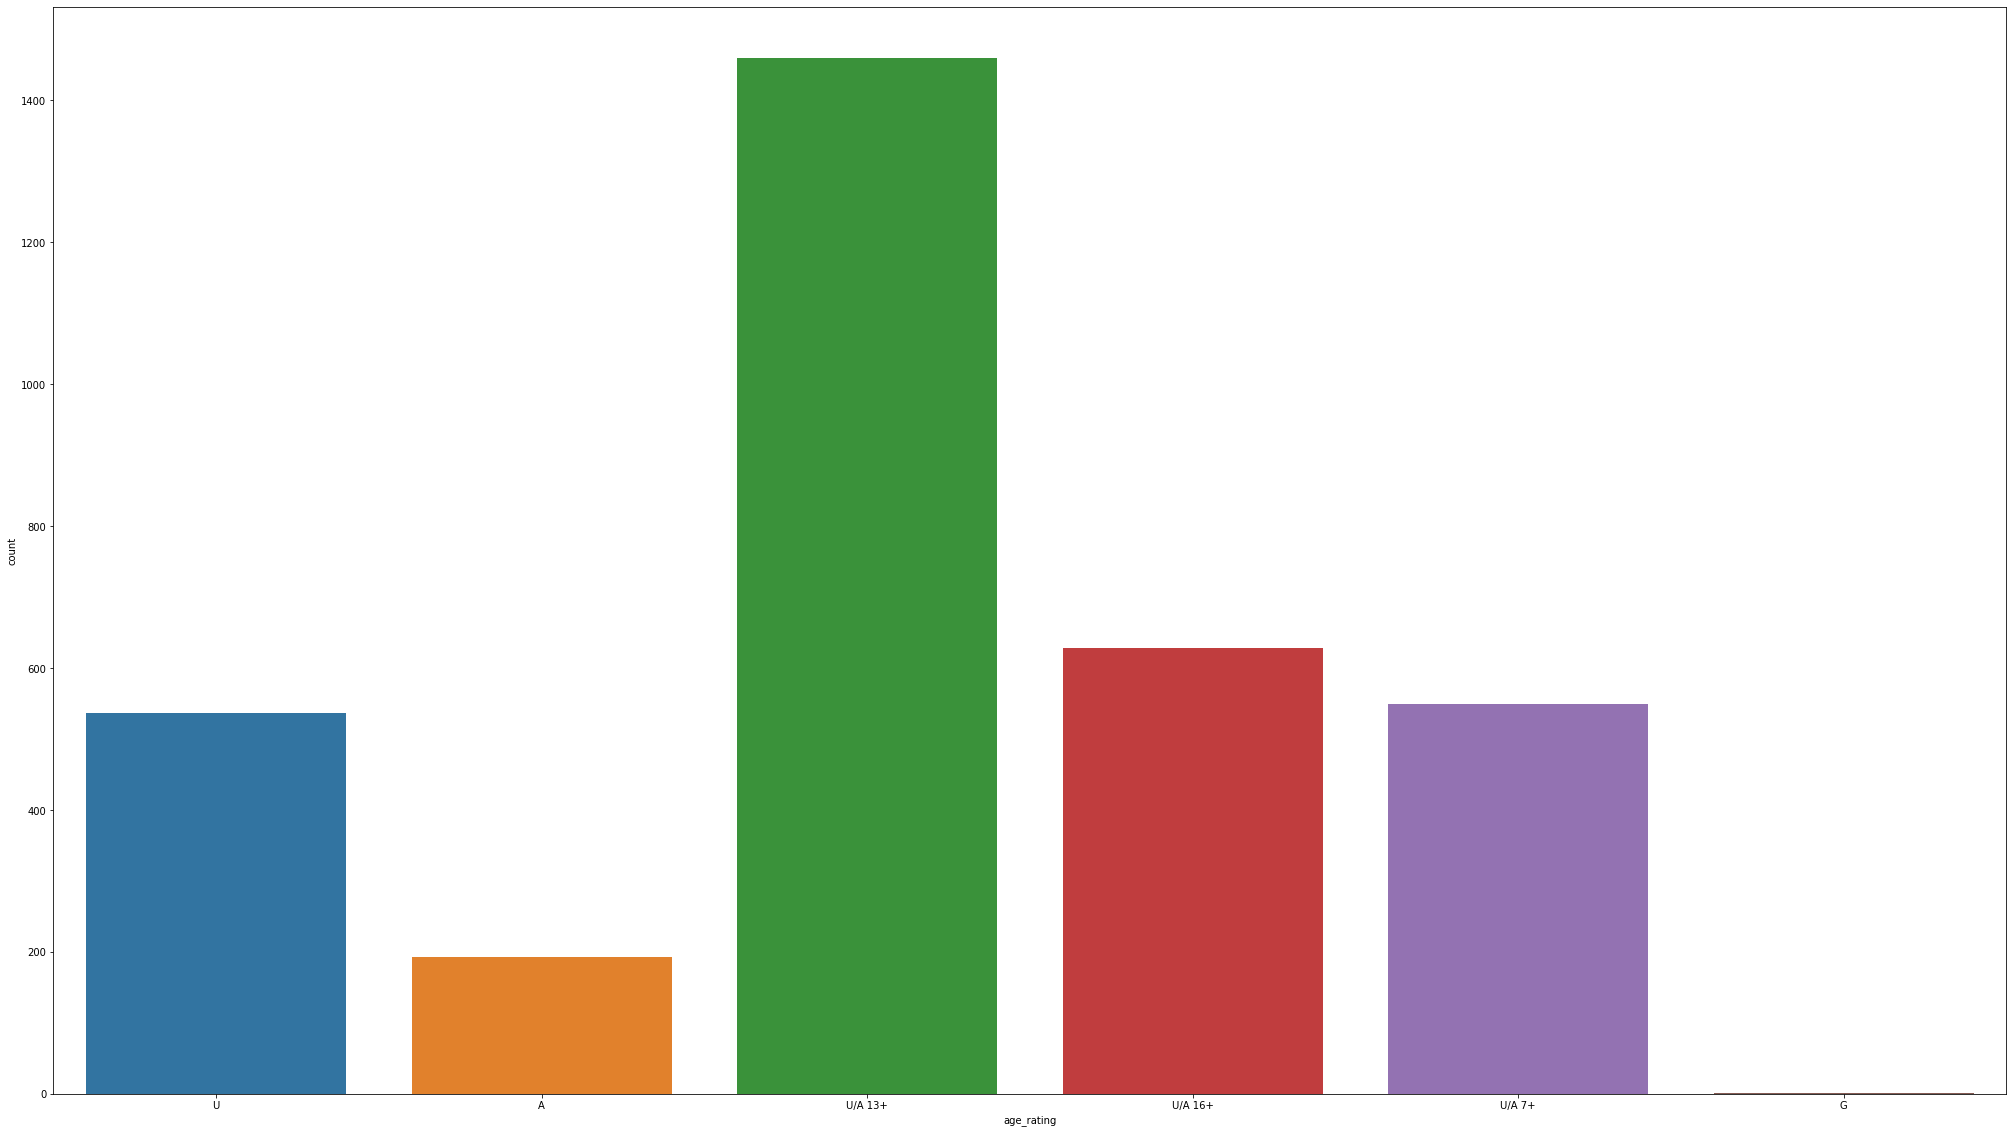

In [37]:
plt.figure(figsize=(35,20))
sns.countplot(df2["age_rating"])

In [38]:
d1={}
for x in df["age_rating"].unique():
    d1[x]=sum(df1[df1["age_rating"]==x].value_counts())-sum(df2[df2["age_rating"]==x].value_counts())
for c in d1.keys():
    print(c,":",d1[c])

U/A 13+ : -62
U/A 7+ : -2
U : 179
A : -76
U/A 16+ : -124
G : -1


This shows the rise of A,G and PG content and fall of 13+,U and 7+ content. Overall, most available content is of U/A 13+, but this analysis has shown the rise of adult content over time

In [39]:
from wordcloud import WordCloud,STOPWORDS
stopwords=set(STOPWORDS)

In [40]:
print(stopwords)

{"wasn't", 'so', 'where', 'them', 'i', 'themselves', 'do', 'since', 'by', 'who', "hasn't", "you'll", "let's", 'he', "how's", 'whom', 'of', 'after', "didn't", "they'll", "you've", 'cannot', 'not', 'at', 'into', "i'd", 'its', 'him', 'himself', 'until', 'during', 'both', 'therefore', 'nor', 'hence', 'me', "who's", 'her', 'yourselves', 'yourself', 'then', "that's", 'she', 'down', 'no', 'com', "weren't", 'would', 'shall', 'here', 'these', "isn't", 'having', 'for', 'were', 'under', "you're", 'r', 'yours', 'had', 'to', 'myself', 'a', 'those', 'against', "he's", 'like', 'what', 'an', "they'd", 'which', 'ours', 'that', 'theirs', 'also', 'his', 'why', "he'd", 'did', 'if', 'herself', 'out', 'we', 'ought', 'am', 'while', "where's", 'off', 'been', 'could', 'have', "we're", 'above', "aren't", 'does', "can't", 'more', "shouldn't", 'your', 'than', 'they', 'most', 'this', "it's", 'as', "we'd", 'all', 'between', 'is', 'only', 'with', 'you', "he'll", 'can', 'http', 'from', 'was', "why's", "she'll", 'abou

In [41]:
doc_overall=[]
for i in df["description"]:
    y=i.split(" ")
    doc_overall.extend([z for z in y if z not in stopwords])
    

In [42]:
doc_1=[]
for i in df1["description"]:
    y=i.split(" ")
    doc_1.extend([z for z in y if z not in stopwords])

In [43]:
doc_2=[]
for i in df2["description"]:
    y=i.split(" ")
    doc_2.extend([z for z in y if z not in stopwords])

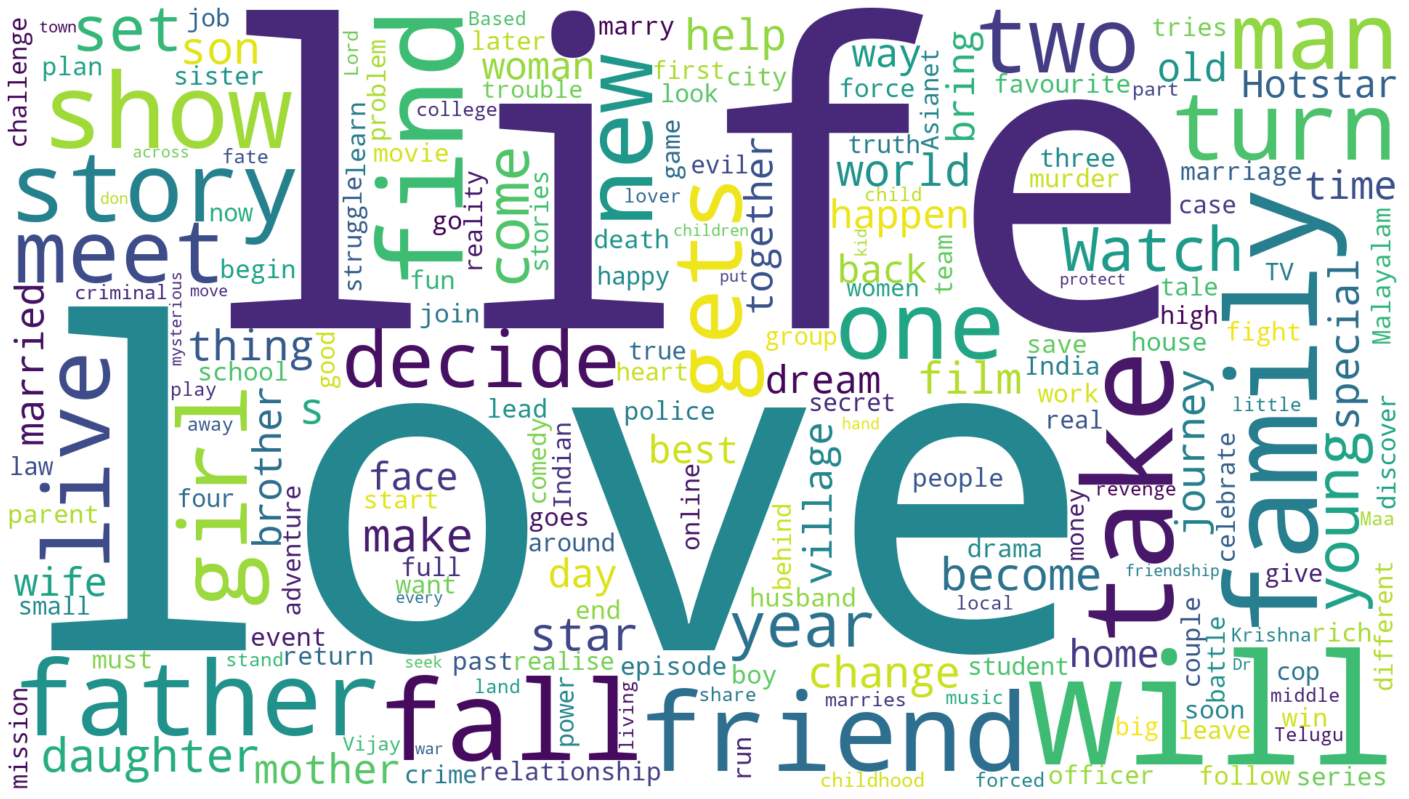

In [44]:
plt.figure(figsize=(25,15))
word_cloud_overall = WordCloud(collocations = False, background_color = 'white',
                        width = 1920, height = 1080).generate(" ".join(doc_overall))
plt.imshow(word_cloud_overall, interpolation='bilinear')
plt.axis("off")
plt.show()

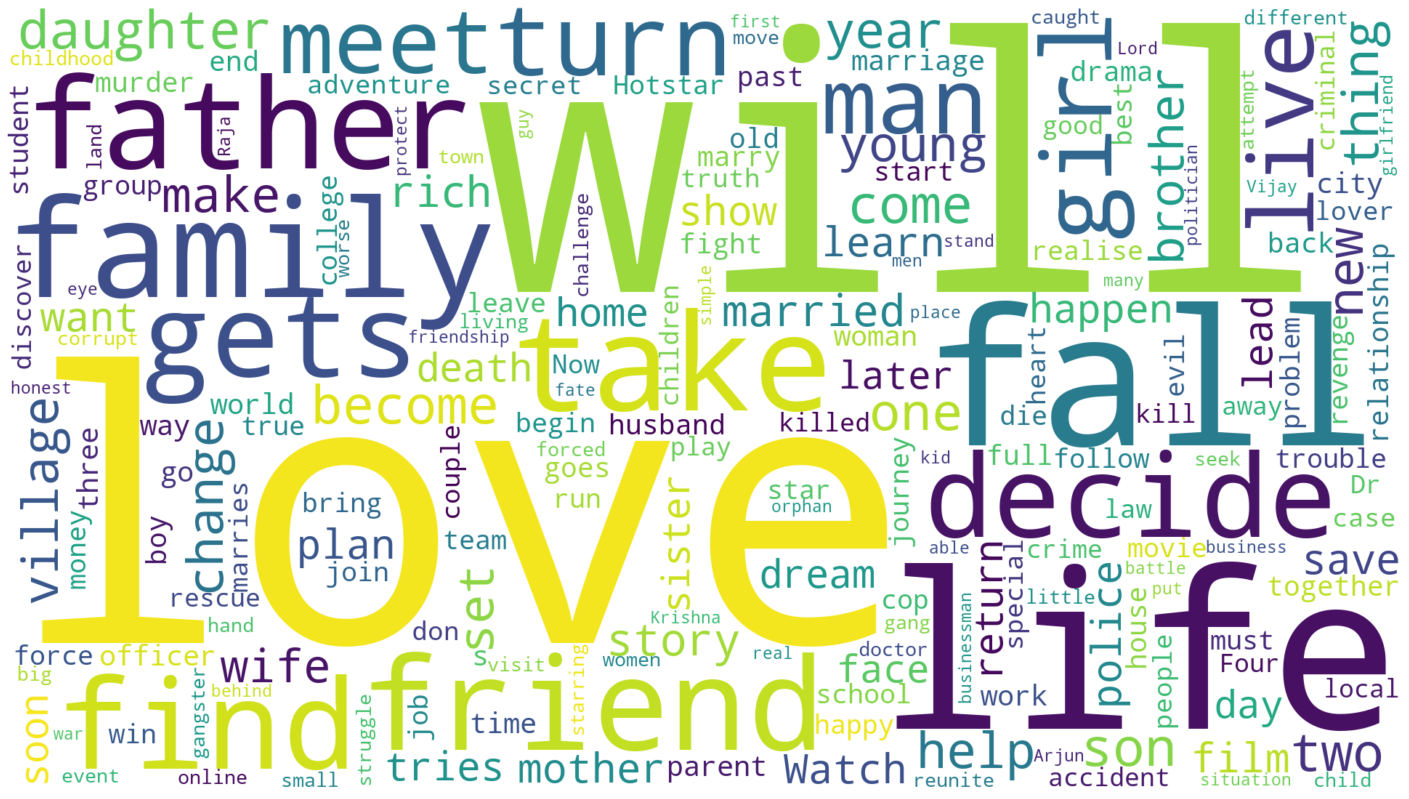

In [45]:
plt.figure(figsize=(25,15))
word_cloud_1 = WordCloud(collocations = False, background_color = 'white',
                        width = 1920, height = 1080).generate(" ".join(doc_1))
plt.imshow(word_cloud_1, interpolation='bilinear')
plt.axis("off")
plt.show()

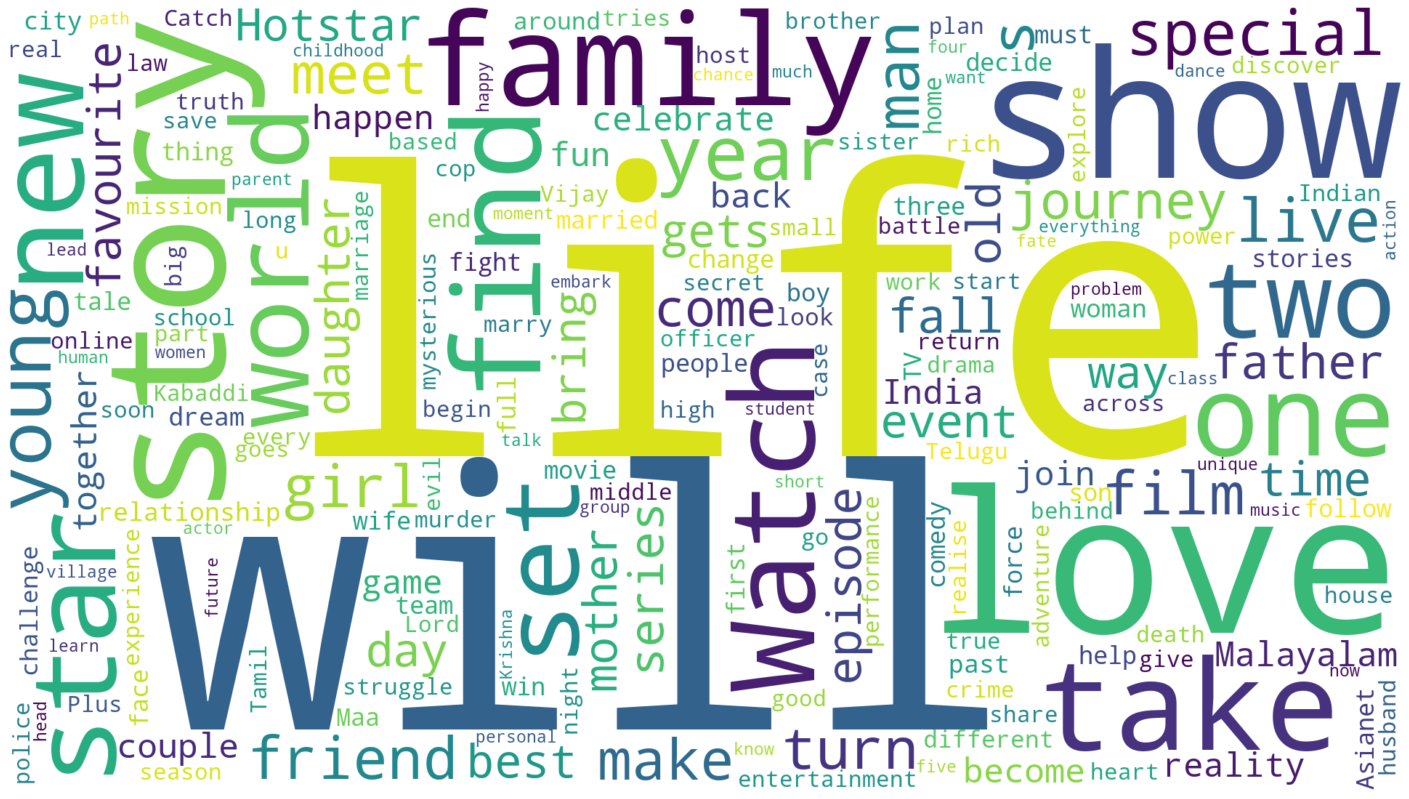

In [46]:
plt.figure(figsize=(25,15))
word_cloud_2 = WordCloud(collocations = False, background_color = 'white',
                        width = 1920, height = 1080).generate(" ".join(doc_2))
plt.imshow(word_cloud_2, interpolation='bilinear')
plt.axis("off")
plt.show()

Overall dominant words in description are "Love","life","will","family" and "watch". However, "love" as a trend seems to be drastically decreasing since 2016 and "life","story" have grown frequency. Rest all almost have remained the same during time

Now, let us do one more experimentation, which remains, i.e movies vs tv series. So we are gonna make a split for movies vs web series, since we haven't explored this aspect in detail.

In [47]:
df_movies=df[df["type"]=="movie"]
df_series=df[df["type"]=="tv"]

Note: Since we already discovered through previous analytics that web series have mainly dominated in era 2 and movies were pre dominant in era 1, we don't need to split df1 and df2 further, just one split will do

In [48]:
d_movie_tv={}
for x in df["age_rating"].unique():
    d_movie_tv[x]=sum(df_movies[df_movies["age_rating"]==x].value_counts())-sum(df_series[df_series["age_rating"]==x].value_counts())
for c in d_movie_tv.keys():
    print(c,":",d_movie_tv[c])

U/A 13+ : 608
U/A 7+ : 414
U : 487
A : 12
U/A 16+ : 666
G : -1


We can see that web series are tending to cater the mature audience more. The results might seem skewed cause movies are more in count

In [49]:
d_movie_tv2={}
for x in df["genre"].unique():
    d_movie_tv2[x]=sum(df_movies[df_movies["genre"]==x].value_counts())-sum(df_series[df_series["genre"]==x].value_counts())
for c in d_movie_tv2.keys():
    print(c,":",d_movie_tv2[c])

Action : 501
Drama : 977
Romance : 346
Historical : 21
Comedy : 262
Teen : -9
Adventure : 39
Mythology : -50
Animation : 224
Thriller : 257
Horror : 81
Superhero : 26
Crime : 10
Family : 46
Mystery : 15
Science : 5
Animals & Nature : -16
Documentary : 67
Standup Comedy : 47
Musical : 14
Kids : -14
Science Fiction : 34
Biopic : 31
Concert Film : -7
Food : -16
Sport : -176
Fantasy : 2
Shorts : -3
Reality : -394
Docudrama : -1
Travel : -6
Talk Show : -73
Awards : -28
Lifestyle : -24
Kabaddi : -1
Football : -1


Some prominent genres in web series are "reality" and "sport". We can also conclude from this that there is a sharp rise in "reality" and "sport" genre in web series since 2016

In [50]:
doc_movie=[]
for i in df_movies["description"]:
    y=i.split(" ")
    doc_movie.extend([z for z in y if z not in stopwords])

In [51]:
doc_series=[]
for i in df_series["description"]:
    y=i.split(" ")
    doc_series.extend([z for z in y if z not in stopwords])

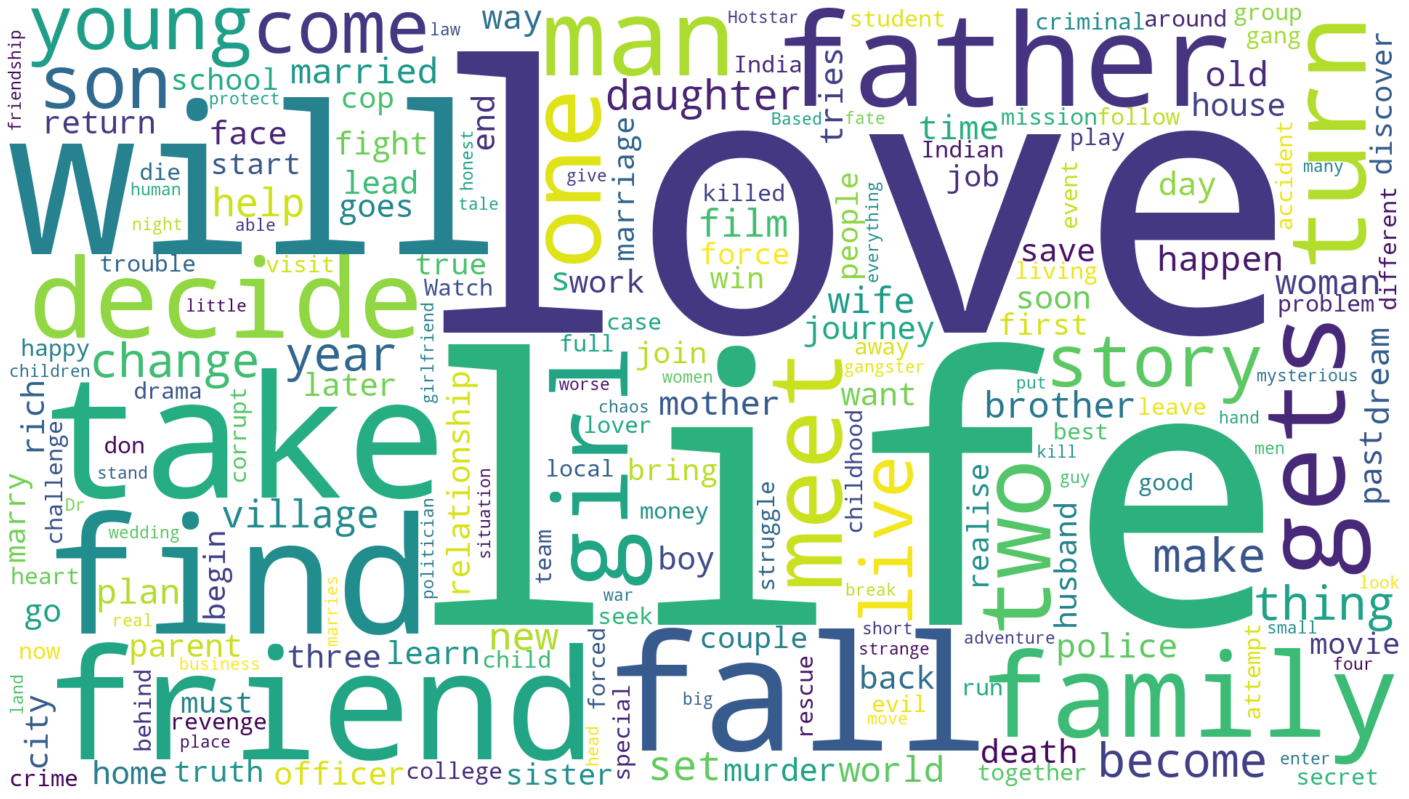

In [52]:
plt.figure(figsize=(25,15))
word_cloud_movie = WordCloud(collocations = False, background_color = 'white',
                        width = 1920, height = 1080).generate(" ".join(doc_movie))
plt.imshow(word_cloud_movie, interpolation='bilinear')
plt.axis("off")
plt.show()

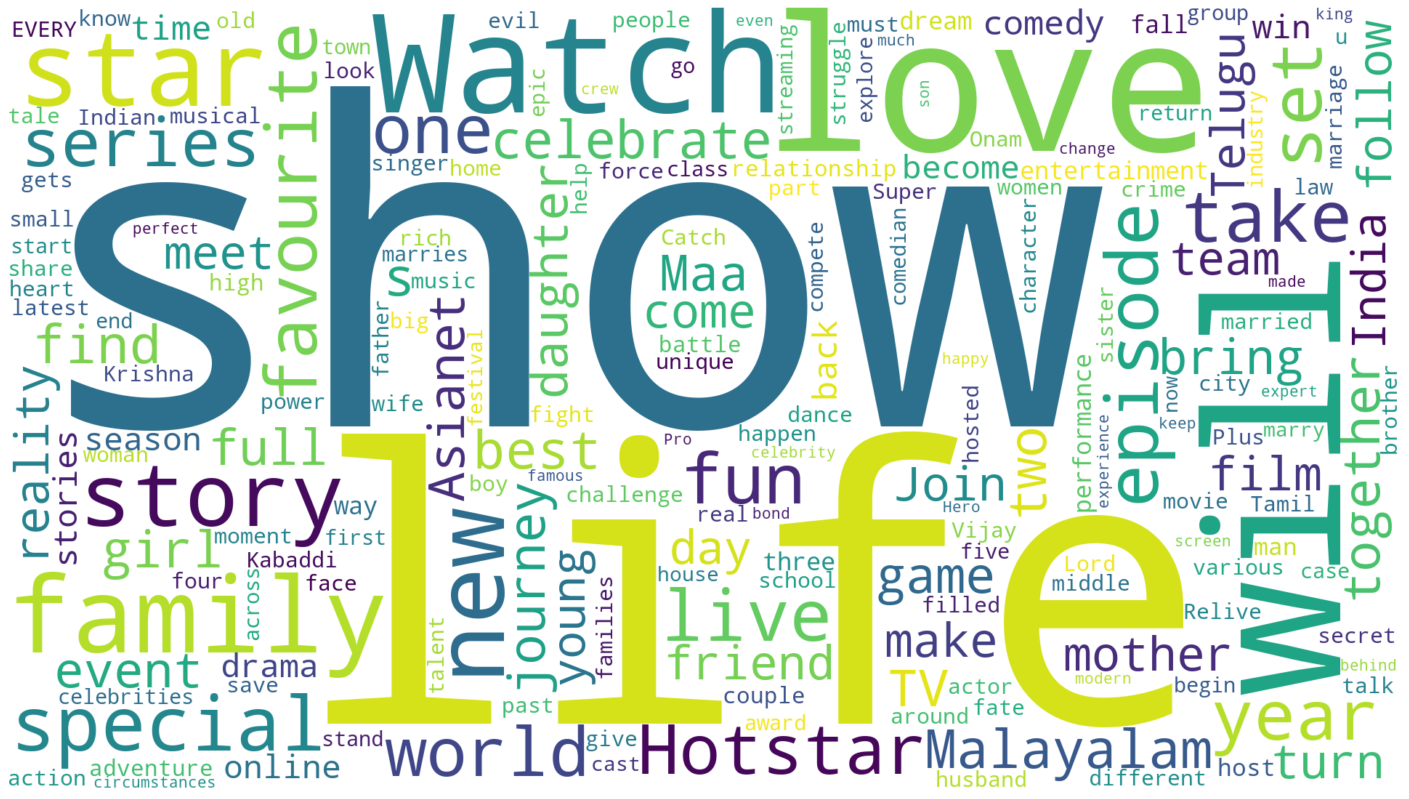

In [53]:
plt.figure(figsize=(25,15))
word_cloud_series = WordCloud(collocations = False, background_color = 'white',
                        width = 1920, height = 1080).generate(" ".join(doc_series))
plt.imshow(word_cloud_series, interpolation='bilinear')
plt.axis("off")
plt.show()

Thank you :)